In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("taxis.csv", index_col=0)

In [3]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
df.rename(columns={"pickup":"depart","dropoff":"arrivee","passengers":"nbpassagers","fare":"tarif","tip":"pourboire","tolls":"peage","color":"couleur",
                  "pickup_zone":"zone_depart","dropoff_zone":"zone_arrivee","pickup_borough":"arrondissement_depart","dropoff_borough":"arrondissement_arrivee"}, inplace=True)

In [5]:
df.head()

,depart,arrivee,nbpassagers,distance,tarif,pourboire,peage,total,couleur,payment,zone_depart,zone_arrivee,arrondissement_depart,arrondissement_arrivee
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [6]:
df.describe()

,nbpassagers,distance,tarif,pourboire,peage,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [7]:
df.isnull().sum()

depart                     0
arrivee                    0
nbpassagers                0
distance                   0
tarif                      0
pourboire                  0
peage                      0
total                      0
couleur                    0
payment                   44
zone_depart               26
zone_arrivee              45
arrondissement_depart     26
arrondissement_arrivee    45
dtype: int64

In [8]:
moy = df["distance"].mean()
print("La distance moyenne parcourue par course est de ", moy)

La distance moyenne parcourue par course est de  3.024616819524328


nbpassagers
1    4678
2     876
5     277
3     243
6     153
4     110
0      96
Name: count, dtype: int64


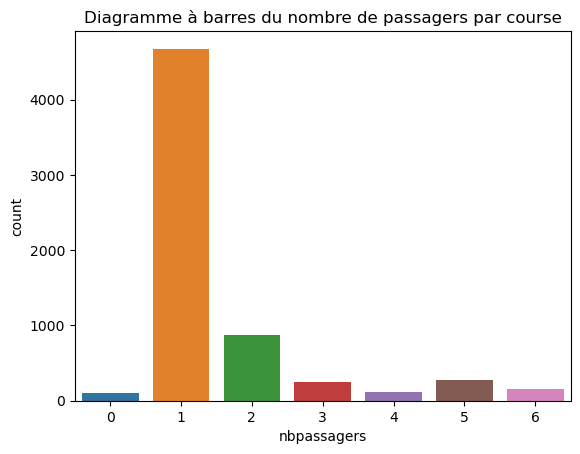

In [9]:
# Calcul du nombre total de passagers par course
passenger_distribution = df['nbpassagers'].value_counts()
print(passenger_distribution)

# Diagramme à barres du nombre de passagers par course
sns.countplot(data=df, x="nbpassagers")
plt.title("Diagramme à barres du nombre de passagers par course")
plt.show()

payment
cash           11.592991
credit card    13.694750
Name: tarif, dtype: float64


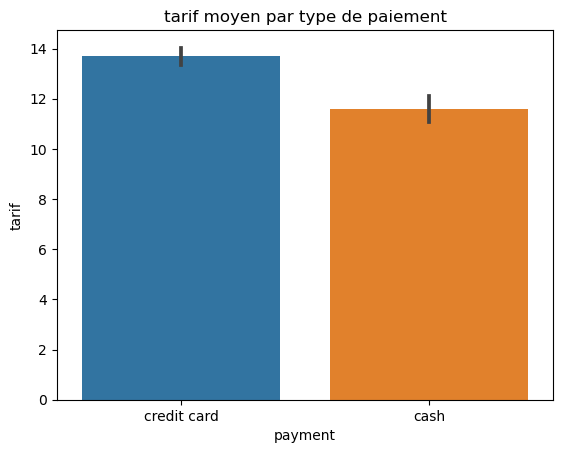

In [10]:
# Calcul du tarif moyen par type de paiement
tm_tp = df.groupby("payment")["tarif"].mean()
print(tm_tp)
# Afficher le graphique du tarif moyen par type de paiement (barplot)
sns.barplot(data=df,x="payment",y="tarif")
plt.title("tarif moyen par type de paiement")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


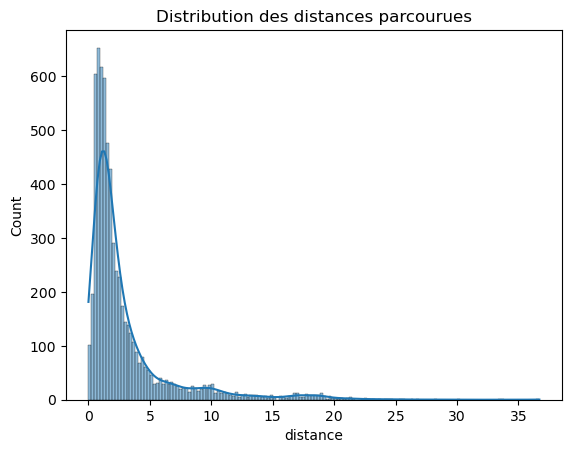

In [11]:
# Avec la courbe de densité (histplot)
sns.histplot(df["distance"],kde=True)
plt.title("Distribution des distances parcourues")
plt.show()

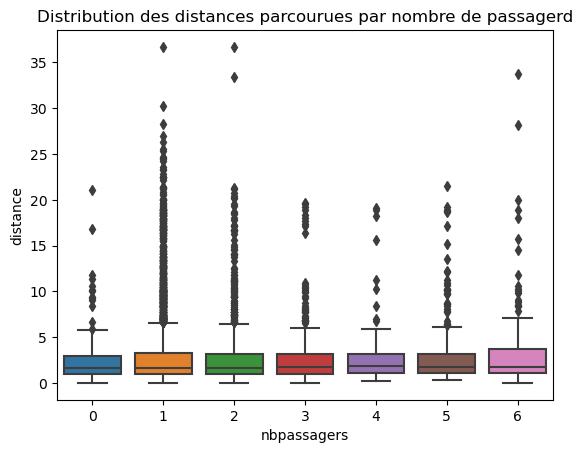

In [12]:
# Boîte à moustache des distances parcourues par nombre de passagers (boxplot)
sns.boxplot(x='nbpassagers', y='distance', data=df)
plt.title('Distribution des distances parcourues par nombre de passagerd')
plt.show()

In [13]:
#Statistiques descriptive des distances parcourues par nombre de passagers
distance_stats = df.groupby('nbpassagers')['distance'].describe()
distance_stats

,count,mean,std,min,25%,50%,75%,max
nbpassagers,,,,,,,,
0,96.0,2.960417,3.590029,0.00,1.0000,1.600,2.9250,21.10
1,4678.0,3.019245,3.798981,0.00,0.9800,1.640,3.2275,36.66
2,876.0,2.978596,3.915500,0.00,0.9775,1.580,3.2000,36.70
3,243.0,3.135844,3.936812,0.00,0.9300,1.700,3.1050,19.62
4,110.0,2.936455,3.541079,0.20,1.1025,1.825,3.1675,19.16
5,277.0,2.964188,3.529105,0.28,1.0300,1.700,3.1100,21.51
6,153.0,3.488758,4.806399,0.00,1.0700,1.750,3.6900,33.76


payment      cash  credit card
nbpassagers                   
0              13           77
1            1312         3334
2             262          609
3              79          164
4              29           80
5              78          199
6              39          114


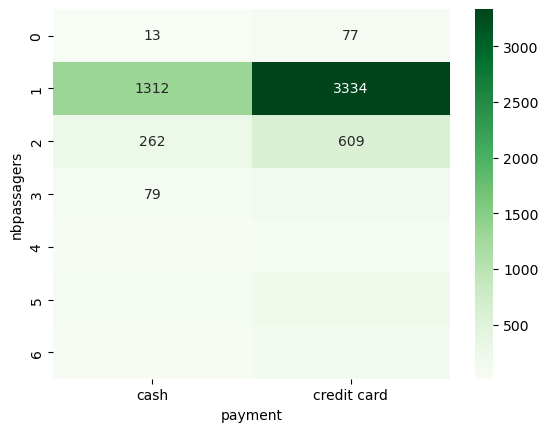

In [14]:
# Tableau croisé du nombre de passagers et du type de paiement
tableau_croisé = pd.crosstab(df['nbpassagers'], df['payment'])
print(tableau_croisé)

# Visualisation (heatmap avec les annotations)
sns.heatmap(tableau_croisé, annot=True, fmt="d", cmap='Greens')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


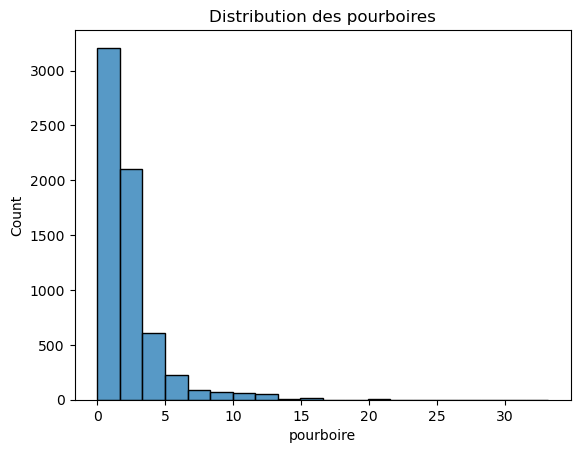

In [15]:
# Avec histplot
sns.histplot(df['pourboire'], bins=20)
plt.title('Distribution des pourboires')
plt.show()

payment
cash           0.000000
credit card    2.781805
Name: pourboire, dtype: float64


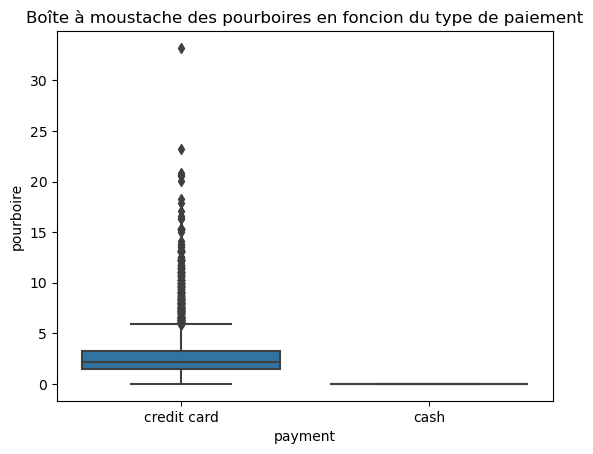

In [16]:
# Calcul des pourboires en foncion du type de paiement
# Calcul de la moyenne des pourboires par type de paiement
pourboire_paiement = df.groupby('payment')['pourboire'].mean()

# Afficher les pourboires moyens par type de paiement
print(pourboire_paiement)


#Boîte à moustache des pourboires en foncion du type de paiement
sns.boxplot(x='payment', y='pourboire', data=df)
plt.title('Boîte à moustache des pourboires en foncion du type de paiement')
plt.show()

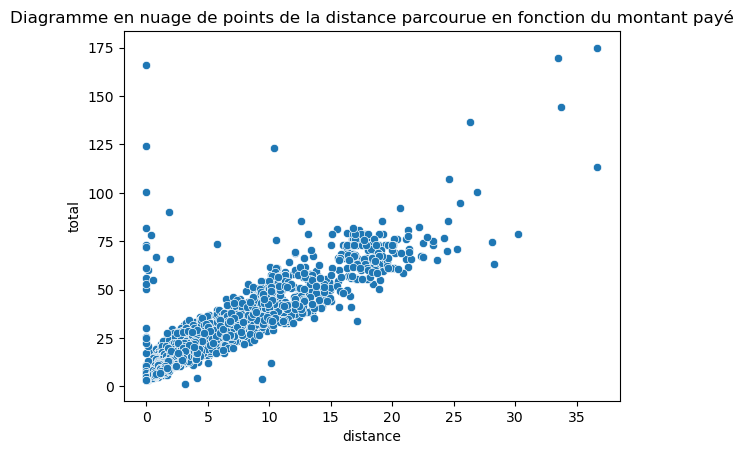

In [17]:
# Boîte à moustache des pourboires en foncion du type de paiement
sns.scatterplot(x='distance', y='total', data=df)
plt.title('Diagramme en nuage de points de la distance parcourue en fonction du montant payé')
plt.show()

In [18]:
# Correlation matrix
correlation_matrix = df.drop(df.select_dtypes(include=['object']).columns, axis=1).corr()
print(correlation_matrix)

             nbpassagers  distance     tarif  pourboire     peage     total
nbpassagers     1.000000  0.009411  0.007637   0.021099 -0.002903  0.015708
distance        0.009411  1.000000  0.920108   0.452589  0.635267  0.904676
tarif           0.007637  0.920108  1.000000   0.488612  0.609307  0.974358
pourboire       0.021099  0.452589  0.488612   1.000000  0.413619  0.646186
peage          -0.002903  0.635267  0.609307   0.413619  1.000000  0.683142
total           0.015708  0.904676  0.974358   0.646186  0.683142  1.000000


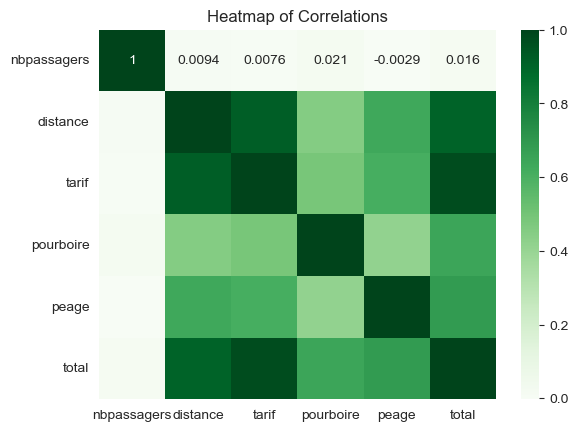

In [21]:
# Heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Heatmap of Correlations')
plt.show()